## Predicting Market Movement of Ethereum with Sentiments from Twitter

####Abstract. 
As with any other industry, cryptocurrency and its market are also influenced by a variety of factors. These can range from general sentiments about blockchain technology and digital currencies, to more specific events like exchange hacks or partnerships between different companies. Twitter has developed into a huge social tool used all over the world for the ex-change of ideas and views. As a consequence of this, cryptocurren-cy investors and traders are looking to utilize the platform so that it can assist them in making sound financial choices. It has been demonstrated that the sentiments gleaned from the contents of Twitter, specifically tweets and comments, are a reliable indicator of the movements of markets. The objec-tive of this paper is to investigate and further explore how sentiments and volume of data from twitter can influence the movement of Ethereum Mar-ket. A number of different classification models were developed based on three features; for a given day, an average sentiment score of tweets, the volume of tweet and an interest score from google trends. Random Forest Classifier and Naïve Bayes model were trained to predict the change in Ethereum market given those features. 


# Data

#### Imports

In [2]:
# imports

import requests
import pandas as pd

import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# twitter api credential
bearer_token = "AAAAAAAAAAAAAAAAAAAAALmDhAEAAAAAo00TTYY5BIu%2FcnSpPmpHGzlk7Ro%3Dw6fjC6W57HeVqQkthB5royMsaHfAkBBx9FoZNZmjUVvux8YSpK"

## Getting Data

### Twitter API Helper functions

In [4]:
# function for creating headers
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [5]:
# creating an actual endpoint
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [6]:
# function for creating a url for searching tweets containing a query
def create_search_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'tweet.fields': 'id,text,author_id,created_at,lang,public_metrics',
                    'next_token': {}}
    return (search_url, query_params)

In [7]:
# function for creating a url for requesting volume of data in a specified range of time

def create_volume_url(keyword, start_date, end_date):
    
    search_url = "https://api.twitter.com/2/tweets/counts/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'granularity': 'day',
                    'next_token': '1jzu9lk96azp0b3x7888hrpw8fgwirw5wnhdu5ji15z1'}
    return (search_url, query_params)

### Tweet Volume from March to July 2022

In [8]:
# meta details
headers = create_headers(bearer_token)
keyword = "ethereum lang:en"
start_time = '2022-03-01T00:00:00.000Z' # March 2022
end_time = '2022-08-01T00:00:00.000Z' # July 2022
next_token = None

# loop control
has_next_page = True
i = 1

df1 = None
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None

while(has_next_page):
  # create url
  url = create_volume_url(keyword, start_time,end_time)

  # connect to endpoint
  json_response = connect_to_endpoint(url[0], headers, url[1], next_token)

  # create a dataframe
  if i == 1:
    df1 = pd.DataFrame(json_response['data'])
  elif i == 2:
    df2 = pd.DataFrame(json_response['data'])
  elif i == 3:
    df3 = pd.DataFrame(json_response['data'])
  elif i == 4:
    df4 = pd.DataFrame(json_response['data'])
  elif i == 5:
    df5 = pd.DataFrame(json_response['data'])
  elif i == 6:
      df6 = pd.DataFrame(json_response['data'])

  i = i +  1
  print(i)

  try:
    json_response['meta']['next_token']
    next_token = json_response['meta']['next_token']
  except KeyError:
    has_next_page = False
  

Endpoint Response Code: 200
2
Endpoint Response Code: 200
3
Endpoint Response Code: 200
4
Endpoint Response Code: 200
5
Endpoint Response Code: 200
6


In [9]:
# DataFrame for tweet counts
volume_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True, sort=False)

In [10]:
# save to a csv file
volume_df.to_csv('tweets_volume.csv', encoding='utf-8', index=False)

In [11]:
volume_df = pd.read_csv('tweets_volume.csv')
volume_df.head()

,end,start,tweet_count
0,2022-07-02T00:00:00.000Z,2022-07-01T00:00:00.000Z,93609
1,2022-07-03T00:00:00.000Z,2022-07-02T00:00:00.000Z,83643
2,2022-07-04T00:00:00.000Z,2022-07-03T00:00:00.000Z,80860
3,2022-07-05T00:00:00.000Z,2022-07-04T00:00:00.000Z,100957
4,2022-07-06T00:00:00.000Z,2022-07-05T00:00:00.000Z,117632


Text(0, 0.5, 'Tweet Count')

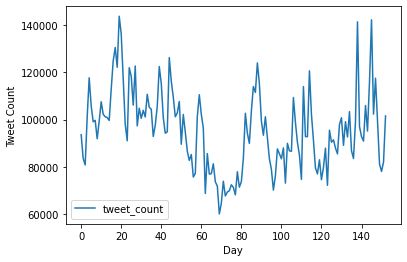

In [12]:
plt = volume_df.plot()
plt.set_xlabel("Day")
plt.set_ylabel("Tweet Count")

In [13]:
start_list =    ['2022-03-01T00:00:00.000Z',
                 '2022-04-01T00:00:00.000Z',
                 '2022-05-01T00:00:00.000Z',
                 '2022-06-01T00:00:00.000Z',
                 '2022-07-01T00:00:00.000Z']

end_list =      ['2022-03-31T00:00:00.000Z',
                 '2022-04-30T00:00:00.000Z',
                 '2022-05-31T00:00:00.000Z',
                 '2022-06-30T00:00:00.000Z',
                 '2022-07-31T00:00:00.000Z']

                 

### Historical Ethereum Prices from March to July 2022
Downloaded from Yahoo Finance.

In [16]:
ethereum_data = pd.read_csv("ETH-USD.csv")

In [17]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       153 non-null    object 
 1   Open       153 non-null    float64
 2   High       153 non-null    float64
 3   Low        153 non-null    float64
 4   Close      153 non-null    float64
 5   Adj Close  153 non-null    float64
 6   Volume     153 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.5+ KB


In [ ]:
volume_df.info()

t = dateutil.parser.parse(tweet['created_at'])

In [ ]:
import dateutil

t = dateutil.parser.parse("2022-07-31T00:00:00.000Z")

### Retrieving Tweets on "Ethereum"

#### VADER - NLTK's pretrained sentiment Analyzer

In [ ]:
# sentiment scores
def sentiment_scores(str_tweets):
  from nltk.sentiment import SentimentIntensityAnalyzer

  polarity_scores = []
  sia = SentimentIntensityAnalyzer()
  for s in str_tweets:
    polarity_scores.append(sia.polarity_scores(s))

  return polarity_scores

#### Function to Clean Data

In [ ]:
import re, string
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def remove_noise(tweets):
  # remove links
  import re
  tweets = [re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet) for tweet in tweets]

  # removing handles
  tweets = [re.sub('(@[A-Za-z0-9_]+)', '', tweet) for tweet in tweets]
  
  return tweets


# function to tokenize tweets
def tokenize_tweets(tweets):
  from nltk.tokenize import word_tokenize
  tokenized_tweets = []

  for tweet in tweets:
    tokenized_tweets.append(word_tokenize(tweet))

  return tokenized_tweets


# main cleaning function
def clean_data(tweet_tokens, stop_words=()):
  """
    Cleans twitter text.
      - filtering noise (hyperlinks, @)
      - Part of speech Tagging
      - Lemmatization
      - filtering stop_words

  """
  cleaned_tokens = []


  # part of speech tagging
  pos = pos_tag(tweet_tokens)

  for token, tag in pos:

    # removing links
    token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
    
    
    # removing handles
    token = re.sub("(@[A-Za-z0-9_]+)","", token)

    # lemmatization

    if tag.startswith('NN'):
      pos = 'n'
    elif tag.startswith('VB'):
      pos = 'v'
    else:
      pos = 'a'

    # lemmatizer = WordNetLemmatizer()
    # token = lemmatizer.lemmatize(token, pos)

    # filter stop words and punctuations
    if len(token) > 0 and token not in string.punctuation:
      cleaned_tokens.append(token.lower())

  return cleaned_tokens

#### Pipeline for processing tweets from the API

In [ ]:
def compound_sentiment(date, tweets):

  # print(tweets[4]) 

  # remove links
  tweets_no_links = remove_noise(tweets)
  # print(tweets_no_links[4]) 

  # word tokenize tweets
  t_ = tokenize_tweets(tweets_no_links)
  # print(t_[4]) 

  # clean tweets
  cleaned_tweets = [clean_data(tweet) for tweet in t_]
  # print(cleaned_tweets[4])

  # join cleaned tokens 
  tweets_string = [" ".join(c_t) for c_t in cleaned_tweets]
  # print(tweets_string[4])

  # check polarity
  polarity_scores = sentiment_scores(tweets_string)
  # print(polarity_scores[4])
  # print(polarity_scores)

  # average compound sentiment
  num_tweets = len(tweets)
  total_compound = 0
  for score in polarity_scores:
    total_compound += score['compound']
  average_compound_sentiment =  total_compound / num_tweets

  # return dictionary
  return {"Date": date, "Compound Sentiment": average_compound_sentiment}

  
  

#### Retrieving Twitter Data on Ethereum from March 2022 to July 2022

In [ ]:
def custom_pipe(dates):
  headers = create_headers(bearer_token)
  keyword = "ethereum lang:en -is:retweet -has:hashtags"
  max_results = 500

  # track number of tweets
  tweet_count = 0

  # a list of dictionaries {Day, Sentiment}
  sentiment_data = []

  for i in range(len(dates)):
    if i == len(dates) - 1:
      break

    # set start and end time
    start_time = dates[i]
    end_time = dates[i + 1]

    # make request
    url = create_search_url(keyword, start_time,end_time, max_results)
    json_response = connect_to_endpoint(url[0], headers, url[1])
    data = json_response['data']
    for j in range(2):
      try:
        next_token = json_response['meta']['next_token']
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        data += json_response['data']
        # wait a min
        time.sleep(10)
      except KeyError:
        break
      
      

    # put all tweets for that range in a list
    tweets_in_range = [i['text'] for i in data]
    
    # update count
    tweet_count += len(tweets_in_range)

    # perform sentiment analysis
    day_data = compound_sentiment(start_time, tweets_in_range)

    # add to sentiment data
    sentiment_data.append(day_data)

  return {"count": tweet_count, 'data': sentiment_data}


In [ ]:
# import time
# months = [march, april, may, june, july]

# tweet_count = 0
# all_data = []

# for month in months:
#   data = custom_pipe(month)
#   all_data += data['data']

#   tweet_count += data['count']

#   # wait a min
#   time.sleep(61)


45190 + 26510 = No of tweets

Convert data to a DataFrame

In [ ]:
data_df = pd.DataFrame(all_data)
data_df.head()

In [ ]:
# save to csv
data_df.to_csv('daily_sentiment.csv', encoding='utf-8', index=False)

##### Dates

In [ ]:
march = [
    "2022-03-01T00:00:00.000Z",
    "2022-03-02T00:00:00.000Z",
    "2022-03-03T00:00:00.000Z",
    "2022-03-04T00:00:00.000Z",
    "2022-03-05T00:00:00.000Z",
    "2022-03-06T00:00:00.000Z",
    "2022-03-07T00:00:00.000Z",
    "2022-03-08T00:00:00.000Z",
    "2022-03-09T00:00:00.000Z",
    "2022-03-10T00:00:00.000Z",
    "2022-03-11T00:00:00.000Z",
    "2022-03-12T00:00:00.000Z",
    "2022-03-13T00:00:00.000Z",
    "2022-03-14T00:00:00.000Z",
    "2022-03-15T00:00:00.000Z",
    "2022-03-16T00:00:00.000Z",
    "2022-03-17T00:00:00.000Z",
    "2022-03-18T00:00:00.000Z",
    "2022-03-19T00:00:00.000Z",
    "2022-03-20T00:00:00.000Z",
    "2022-03-21T00:00:00.000Z",
    "2022-03-22T00:00:00.000Z",
    "2022-03-23T00:00:00.000Z",
    "2022-03-24T00:00:00.000Z",
    "2022-03-25T00:00:00.000Z",
    "2022-03-26T00:00:00.000Z",
    "2022-03-27T00:00:00.000Z",
    "2022-03-28T00:00:00.000Z",
    "2022-03-29T00:00:00.000Z",
    "2022-03-30T00:00:00.000Z",
    "2022-03-31T00:00:00.000Z",
    "2022-04-01T00:00:00.000Z",
]


april = [
    "2022-04-01T00:00:00.000Z",
    "2022-04-02T00:00:00.000Z",
    "2022-04-03T00:00:00.000Z",
    "2022-04-04T00:00:00.000Z",
    "2022-04-05T00:00:00.000Z",
    "2022-04-06T00:00:00.000Z",
    "2022-04-07T00:00:00.000Z",
    "2022-04-08T00:00:00.000Z",
    "2022-04-09T00:00:00.000Z",
    "2022-04-10T00:00:00.000Z",
    "2022-04-11T00:00:00.000Z",
    "2022-04-12T00:00:00.000Z",
    "2022-04-13T00:00:00.000Z",
    "2022-04-14T00:00:00.000Z",
    "2022-04-15T00:00:00.000Z",
    "2022-04-16T00:00:00.000Z",
    "2022-04-17T00:00:00.000Z",
    "2022-04-18T00:00:00.000Z",
    "2022-04-19T00:00:00.000Z",
    "2022-04-20T00:00:00.000Z",
    "2022-04-21T00:00:00.000Z",
    "2022-04-22T00:00:00.000Z",
    "2022-04-23T00:00:00.000Z",
    "2022-04-24T00:00:00.000Z",
    "2022-04-25T00:00:00.000Z",
    "2022-04-26T00:00:00.000Z",
    "2022-04-27T00:00:00.000Z",
    "2022-04-28T00:00:00.000Z",
    "2022-04-29T00:00:00.000Z",
    "2022-04-30T00:00:00.000Z",
    "2022-05-01T00:00:00.000Z",
]



may = [
    "2022-05-01T00:00:00.000Z",
    "2022-05-02T00:00:00.000Z",
    "2022-05-03T00:00:00.000Z",
    "2022-05-04T00:00:00.000Z",
    "2022-05-05T00:00:00.000Z",
    "2022-05-06T00:00:00.000Z",
    "2022-05-07T00:00:00.000Z",
    "2022-05-08T00:00:00.000Z",
    "2022-05-09T00:00:00.000Z",
    "2022-05-10T00:00:00.000Z",
    "2022-05-11T00:00:00.000Z",
    "2022-05-12T00:00:00.000Z",
    "2022-05-13T00:00:00.000Z",
    "2022-05-14T00:00:00.000Z",
    "2022-05-15T00:00:00.000Z",
    "2022-05-16T00:00:00.000Z",
    "2022-05-17T00:00:00.000Z",
    "2022-05-18T00:00:00.000Z",
    "2022-05-19T00:00:00.000Z",
    "2022-05-20T00:00:00.000Z",
    "2022-05-21T00:00:00.000Z",
    "2022-05-22T00:00:00.000Z",
    "2022-05-23T00:00:00.000Z",
    "2022-05-24T00:00:00.000Z",
    "2022-05-25T00:00:00.000Z",
    "2022-05-26T00:00:00.000Z",
    "2022-05-27T00:00:00.000Z",
    "2022-05-28T00:00:00.000Z",
    "2022-05-29T00:00:00.000Z",
    "2022-05-30T00:00:00.000Z",
    "2022-05-31T00:00:00.000Z",
    "2022-06-01T00:00:00.000Z",
]



june = [
    "2022-06-01T00:00:00.000Z",
    "2022-06-02T00:00:00.000Z",
    "2022-06-03T00:00:00.000Z",
    "2022-06-04T00:00:00.000Z",
    "2022-06-05T00:00:00.000Z",
    "2022-06-06T00:00:00.000Z",
    "2022-06-07T00:00:00.000Z",
    "2022-06-08T00:00:00.000Z",
    "2022-06-09T00:00:00.000Z",
    "2022-06-10T00:00:00.000Z",
    "2022-06-11T00:00:00.000Z",
    "2022-06-12T00:00:00.000Z",
    "2022-06-13T00:00:00.000Z",
    "2022-06-14T00:00:00.000Z",
    "2022-06-15T00:00:00.000Z",
    "2022-06-16T00:00:00.000Z",
    "2022-06-17T00:00:00.000Z",
    "2022-06-18T00:00:00.000Z",
    "2022-06-19T00:00:00.000Z",
    "2022-06-20T00:00:00.000Z",
    "2022-06-21T00:00:00.000Z",
    "2022-06-22T00:00:00.000Z",
    "2022-06-23T00:00:00.000Z",
    "2022-06-24T00:00:00.000Z",
    "2022-06-25T00:00:00.000Z",
    "2022-06-26T00:00:00.000Z",
    "2022-06-27T00:00:00.000Z",
    "2022-06-28T00:00:00.000Z",
    "2022-06-29T00:00:00.000Z",
    "2022-06-30T00:00:00.000Z",
    "2022-07-01T00:00:00.000Z",
]



july = [
    "2022-07-01T00:00:00.000Z",
    "2022-07-02T00:00:00.000Z",
    "2022-07-03T00:00:00.000Z",
    "2022-07-04T00:00:00.000Z",
    "2022-07-05T00:00:00.000Z",
    "2022-07-06T00:00:00.000Z",
    "2022-07-07T00:00:00.000Z",
    "2022-07-08T00:00:00.000Z",
    "2022-07-09T00:00:00.000Z",
    "2022-07-10T00:00:00.000Z",
    "2022-07-11T00:00:00.000Z",
    "2022-07-12T00:00:00.000Z",
    "2022-07-13T00:00:00.000Z",
    "2022-07-14T00:00:00.000Z",
    "2022-07-15T00:00:00.000Z",
    "2022-07-16T00:00:00.000Z",
    "2022-07-17T00:00:00.000Z",
    "2022-07-18T00:00:00.000Z",
    "2022-07-19T00:00:00.000Z",
    "2022-07-20T00:00:00.000Z",
    "2022-07-21T00:00:00.000Z",
    "2022-07-22T00:00:00.000Z",
    "2022-07-23T00:00:00.000Z",
    "2022-07-24T00:00:00.000Z",
    "2022-07-25T00:00:00.000Z",
    "2022-07-26T00:00:00.000Z",
    "2022-07-27T00:00:00.000Z",
    "2022-07-28T00:00:00.000Z",
    "2022-07-29T00:00:00.000Z",
    "2022-07-30T00:00:00.000Z",
    "2022-07-31T00:00:00.000Z",
    "2022-08-01T00:00:00.000Z",
]

total = len(march) + len(april) + len(may) + len(june) + len(july)

### Trends from Google

In [ ]:
eth_trends = pd.read_csv("eth-trend.csv")

In [ ]:
eth_trends.head()

# EDA

## Numerical EDA

In [63]:
eth_df = pd.read_csv("ETH-USD.csv")
volume_df = pd.read_csv('tweets_volume.csv')
daily_sentiment = pd.read_csv("daily_sentiment.csv")
eth_trends = pd.read_csv("eth-trend.csv")

In [126]:
print(eth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       153 non-null    object 
 1   Open       153 non-null    float64
 2   High       153 non-null    float64
 3   Low        153 non-null    float64
 4   Close      153 non-null    float64
 5   Adj Close  153 non-null    float64
 6   Volume     153 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.5+ KB
None


In [92]:
print(volume_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   end          153 non-null    object
 1   start        153 non-null    object
 2   tweet_count  153 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ KB
None


In [93]:
print(daily_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                153 non-null    object 
 1   Compound Sentiment  153 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None


In [151]:
eth_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change
0,2022-03-01,2919.775879,3029.651611,2868.938965,2972.485107,2972.485107,18757425786,1
1,2022-03-02,2972.471924,3026.868164,2919.943115,2950.118408,2950.118408,16636517503,0
2,2022-03-03,2950.156738,2964.673340,2797.319336,2834.468994,2834.468994,13091199728,0
3,2022-03-04,2834.987305,2835.176270,2587.748291,2617.156006,2617.156006,14496939024,0
4,2022-03-05,2618.473633,2679.102539,2596.989990,2664.831055,2664.831055,8072368396,1


#### Creating Our Labels

In [64]:
def f(row):
    change = ((row['Close'] - row["Open"]) / row['Open']) * 100
    if change > 0:
      val = 1
    else:
      val = 0
    return val

eth_df["Change"] = eth_df.apply(f, axis=1)

In [65]:
# sort dataframe by date
volume_df = volume_df.sort_values("start", ascending=True)
daily_sentiment = daily_sentiment.sort_values("Date", ascending=True)
eth_df = eth_df.sort_values("Date", ascending=True)
eth_trends = eth_trends.sort_values("Day", ascending=True)

In [66]:
daily_sentiment['Count'] = volume_df['tweet_count'].to_numpy()
daily_sentiment["Close"] = eth_df['Close'].to_numpy()
daily_sentiment["Change"] = eth_df['Change'].to_numpy()
daily_sentiment["Trend"] = eth_trends['Ethereum: (Worldwide)'].to_numpy()
daily_sentiment.tail()

,Date,Compound Sentiment,Count,Close,Change,Trend
148,2022-07-27T00:00:00.000Z,0.135750,105810,1636.232666,1,40
149,2022-07-28T00:00:00.000Z,0.178897,122166,1725.468140,1,48
150,2022-07-29T00:00:00.000Z,0.111037,97136,1727.406982,1,46
151,2022-07-30T00:00:00.000Z,0.122775,104421,1695.969482,0,41
152,2022-07-31T00:00:00.000Z,0.138101,100275,1681.517334,0,39


In [67]:
# Rename column and drop all date columns

df = daily_sentiment.rename(columns={'Compound Sentiment': 'Sentiment', "Close": "Price"})
df.drop('Date', axis=1, inplace=True)
df.head()

,Sentiment,Count,Price,Change,Trend
0,0.243190,91952,2972.485107,1,58
1,0.235499,86876,2950.118408,0,52
2,0.148117,87218,2834.468994,0,47
3,0.202503,83943,2617.156006,0,44
4,0.317556,80204,2664.831055,1,41


In [25]:
# df.drop('Price', axis=1, inplace=True)

In [26]:
# df.to_csv('data.csv', encoding='utf-8', index=False)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sentiment  153 non-null    float64
 1   Count      153 non-null    int64  
 2   Price      153 non-null    float64
 3   Change     153 non-null    int64  
 4   Trend      153 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.2 KB


#### Correlations

In [78]:
corr_matrix = scaled_df.corr()
corr_matrix["Change"]

Sentiment    0.103337
Count       -0.029013
Price        0.088131
Change       1.000000
Trend       -0.018307
Name: Change, dtype: float64

#### Normalize Data

In [69]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled)

In [72]:
scaled_df = scaled_df.rename({0: "Sentiment", 1: "Count",2: "Price", 3: "Change", 4: "Trend"}, axis=1)

## Visual EDA

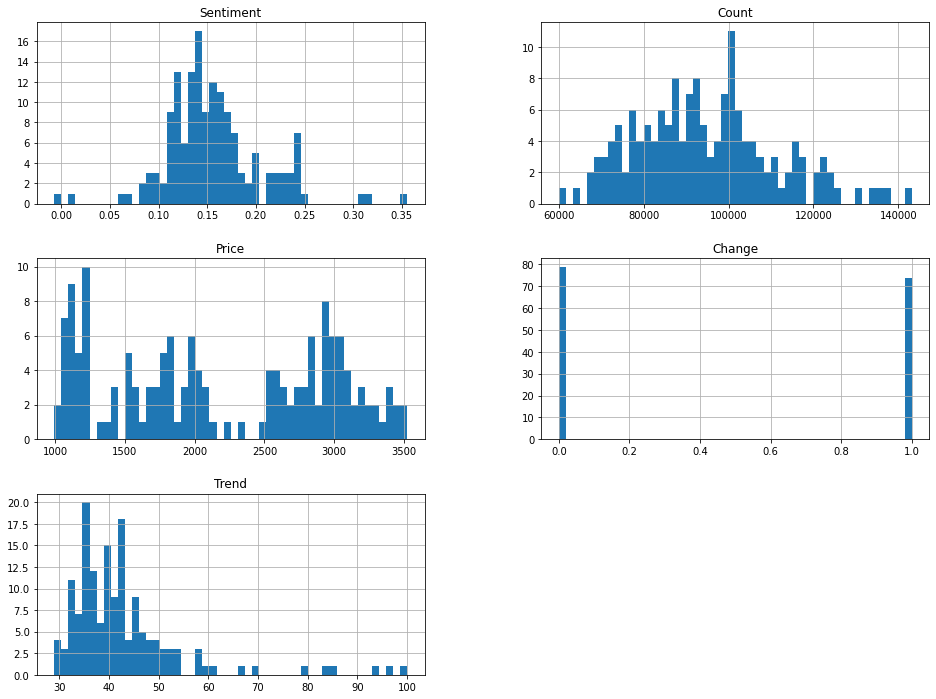

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(16,12))
plt.show()

Text(0.5, 0, 'Day')

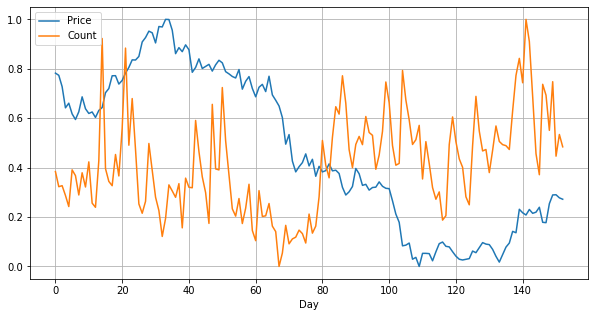

In [77]:
scaled_plot = scaled_df.plot(y=["Price", "Count"], figsize=(10,5), grid=True)
scaled_plot.set_xlabel("Day")

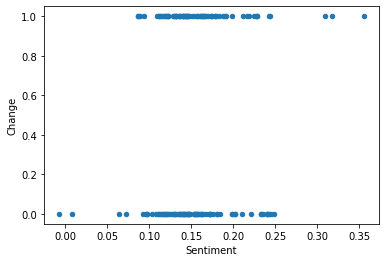

In [42]:
df.plot(kind="scatter", x="Sentiment", y="Change")

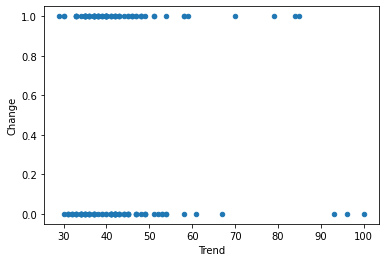

In [43]:
df.plot(kind="scatter", x="Trend", y="Change")

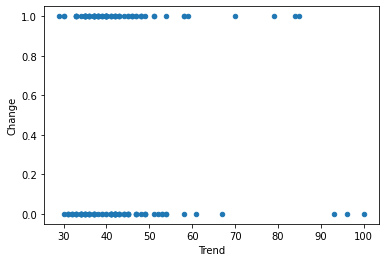

In [44]:
df.plot(kind="scatter", x="Trend", y="Change")

In [ ]:
### Preparing Data for ML

## Preparing Data for ML

### Splitting Data

In [38]:
y = df["Change"]
X = df.drop(["Price", 'Change'], axis=1)

print(X.shape)
print(y.shape)

(153, 3)
(153,)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### KNearestNeighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=5)

# fit regression model to training data
model.fit(X_train, y_train)

KNeighborsClassifier()

#### Model Accuracy

In [47]:
# accuracy of predict on training set
model.score(X_train, y_train)

0.6813186813186813

In [48]:
# accuracy of predict on training set
model.score(X_test, y_test)

0.532258064516129

### Evaluation with Cross Validation

In [49]:
# accuracy using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.52631579, 0.44444444, 0.38888889, 0.66666667, 0.33333333])

### Naive Bayes Classifier

In [50]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB()

#### Accuracy

In [51]:
# accuracy of predict on train set
model.score(X_train, y_train)

0.5494505494505495

In [52]:
# accuracy of predict on test set
model.score(X_test, y_test)

0.43548387096774194

#### Evaluation with cross validation

In [53]:
# accuracy using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.52631579, 0.44444444, 0.33333333, 0.5       , 0.33333333])

### RandomForestClassifier

In [54]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [55]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5161290322580645


#### Cross Validation

In [56]:
# accuracy using cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.47368421, 0.55555556, 0.5       , 0.66666667, 0.38888889])